In [29]:
# Import Libraries
import pandas as pd
import numpy as np
import re
import nltk #Natural Language Toolkit, used to remove stopwords like "the", "is", etc.
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer # TfidfVectorizer Convert text into numbers so a machine can understand it
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score #Evaluate model performance
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\adity\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Load Data
df = pd.read_csv("Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv")
df = df[['reviews.text', 'reviews.rating']].dropna()
df.columns = ['review', 'rating']

In [3]:
# Create Binary Sentiment Label
# Rating 4 or 5 = Positive (1), Rating 1 to 3 = Negative (0)
df['sentiment'] = df['rating'].apply(lambda x: 1 if x > 3 else 0)

In [4]:
# Text Cleaning Function
def clean_text(text):
    text = str(text).lower() #Making all letters lowercase (lower())
    text = re.sub(r'[^a-zA-Z\s]', '', text) #Removing punctuation, numbers, and special characters (re.sub)
    # Removing common stopwords like "is", "the", "was" that don't carry much meaning
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')]) 
    return text

In [5]:
df['clean_review'] = df['review'].apply(clean_text)

In [6]:
# TF-IDF Vectorization
#Converting cleaned text into a numerical format using TF-IDF (Term Frequency–Inverse Document Frequency)
#This gives weight to important words and reduces the impact of very common ones
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['clean_review']).toarray()
y = df['sentiment']

In [20]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [22]:
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

In [23]:
# Train/Test Split, Splitting the dataset into 80% training data and 20% testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# # Model Training
# model = LogisticRegression(class_weight='balanced', max_iter=1000)
# model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [31]:
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [32]:
# Evaluation
y_pred = model.predict(X_test) #Predicting sentiments on the test set
print("Accuracy:", accuracy_score(y_test, y_pred)) #Calculating accuracy and showing precision, recall, and F1-score
print(classification_report(y_test, y_pred))

Accuracy: 0.8833598023645668
              precision    recall  f1-score   support

           0       0.46      0.80      0.58       579
           1       0.98      0.89      0.93      5088

    accuracy                           0.88      5667
   macro avg       0.72      0.85      0.76      5667
weighted avg       0.92      0.88      0.90      5667



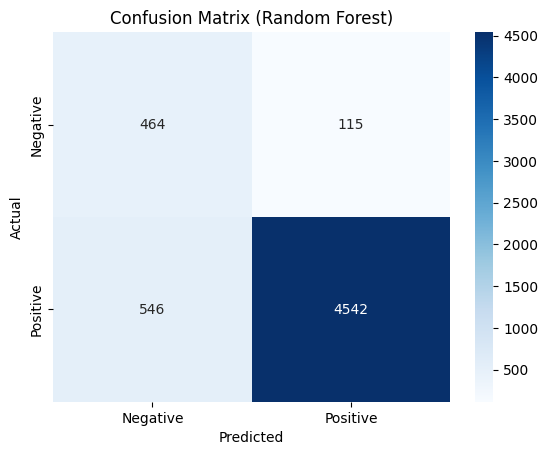

In [35]:
# Confusion Matrix, Visualizing performance with a confusion matrix:
# Shows how many positives/negatives were correctly or wrongly predicted
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Random Forest)')
plt.show()

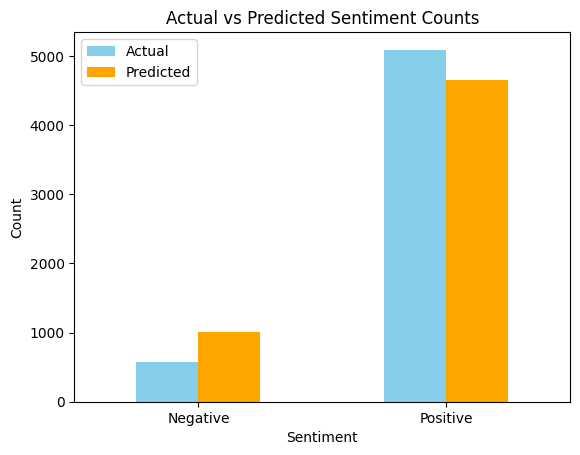

In [34]:
actual_counts = np.bincount(y_test)
pred_counts = np.bincount(y_pred)

df_counts = pd.DataFrame({
    'Sentiment': ['Negative', 'Positive'],
    'Actual': actual_counts,
    'Predicted': pred_counts
})

df_counts.plot(x='Sentiment', kind='bar', color=['skyblue', 'orange'])
plt.title("Actual vs Predicted Sentiment Counts")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

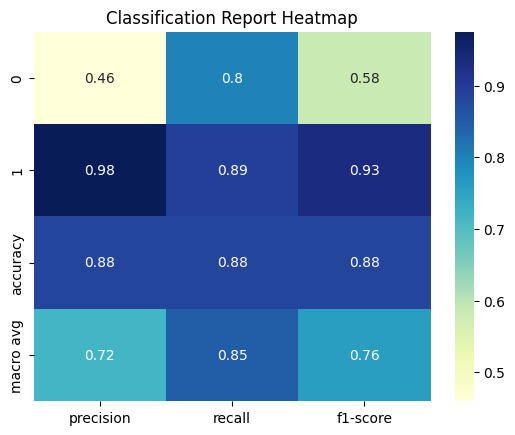

In [28]:
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

sns.heatmap(df_report.iloc[:-1, :-1], annot=True, cmap='YlGnBu')
plt.title("Classification Report Heatmap")
plt.show()

In [36]:
#Word Cloud
#A word cloud is a fun and informative way to visualize the most frequent words in your reviews. 
#The bigger the word, the more often it appears.

In [39]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [40]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

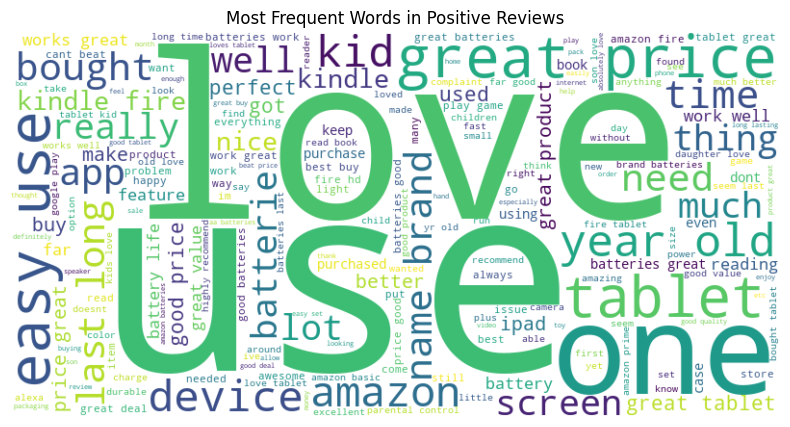

In [41]:
# Combine all reviews into one large string
text = " ".join(df[df['sentiment'] == 1]['clean_review'])  # for positive class

# Generate WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Frequent Words in Positive Reviews")
plt.show()

In [ ]:
#Job Lib
#joblib is a Python library that lets you save your trained machine learning model to a .pkl file 

In [42]:
import joblib

# Save the trained model
joblib.dump(model, 'sentiment_model.pkl')

# Later, load it back
model = joblib.load('sentiment_model.pkl')

In [43]:
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']